In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 179 kB 37.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639758 sha256=3bf1892b5b2775e4323cce8d5e927715bd19710218310b9663f48e601f4ee284
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from prophet import Prophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# https://www.kaggle.com/c/rossmann-store-sales
!wget https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv

--2021-08-01 00:13:17--  https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38057952 (36M) [text/csv]
Saving to: ‘rossmann_train.csv’

rossmann_train.csv  100%[===================>]  36.29M  35.6MB/s    in 1.0s    

2021-08-01 00:13:19 (35.6 MB/s) - ‘rossmann_train.csv’ saved [38057952/38057952]



In [ ]:
df = pd.read_csv('rossmann_train.csv', low_memory=False)

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


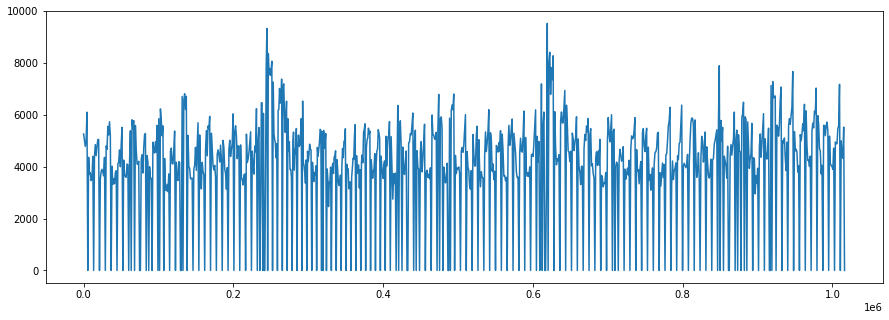

In [ ]:
df[df['Store'] == 1]['Sales'].plot(figsize=(15, 5));

In [ ]:
(df[df['Store'] == 1]['Sales'] == 0).sum()

161

In [ ]:
store1 = df[df['Store'] == 1].copy()

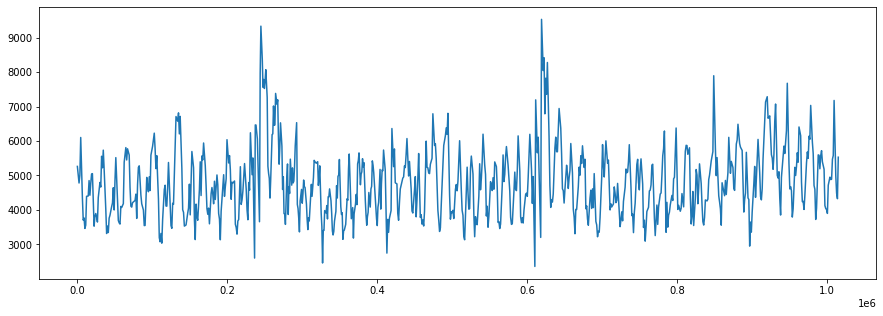

In [ ]:
store1[store1['Open'] > 0]['Sales'].plot(figsize=(15, 5));

In [ ]:
sales0 = store1[store1['Sales'] == 0].index
customers0 = store1[store1['Customers'] == 0].index
store_closed = store1[store1['Open'] == 0].index
print(np.all(sales0 == customers0))
print(np.all(store_closed == customers0))

True
True


In [ ]:
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
store1['Date'] = pd.to_datetime(store1['Date'])

In [ ]:
store1.set_index('Date', inplace=True)

In [ ]:
store1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


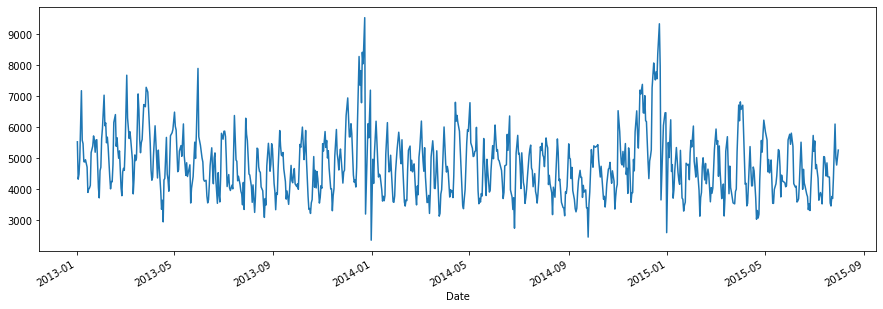

In [ ]:
store1[store1['Customers'] > 0]['Sales'].plot(figsize=(15, 5));

In [ ]:
df_p = store1[['Sales']].copy()

In [ ]:
df_p['Date'] = df_p.index

In [ ]:
df_p.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [ ]:
df_p.tail()

,Sales,Date
Date,,
2013-01-05,4997,2013-01-05
2013-01-04,4486,2013-01-04
2013-01-03,4327,2013-01-03
2013-01-02,5530,2013-01-02
2013-01-01,0,2013-01-01


In [ ]:
df_p.sort_index(inplace=True)

In [ ]:
df_p.head(20)

,Sales,Date
Date,,
2013-01-01,0,2013-01-01
2013-01-02,5530,2013-01-02
2013-01-03,4327,2013-01-03
2013-01-04,4486,2013-01-04
2013-01-05,4997,2013-01-05
2013-01-06,0,2013-01-06
2013-01-07,7176,2013-01-07
2013-01-08,5580,2013-01-08
2013-01-09,5471,2013-01-09


In [ ]:
df_p.tail()

,Sales,Date
Date,,
2015-07-27,6102,2015-07-27
2015-07-28,5011,2015-07-28
2015-07-29,4782,2015-07-29
2015-07-30,5020,2015-07-30
2015-07-31,5263,2015-07-31


In [ ]:
df_p.columns = ['y', 'ds']

In [ ]:
m = Prophet()

In [ ]:
m.fit(df_p)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)

In [ ]:
future.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [ ]:
future.tail()

,ds
1302,2016-07-26
1303,2016-07-27
1304,2016-07-28
1305,2016-07-29
1306,2016-07-30


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1302,2016-07-26,3701.618142,3025.487150,5878.495113,3679.607052,3722.222810,715.389678,715.389678,715.389678,706.313560,706.313560,706.313560,9.076118,9.076118,9.076118,0.0,0.0,0.0,4417.007820
1303,2016-07-27,3701.345590,2769.028329,5631.193323,3679.232372,3722.032285,504.344882,504.344882,504.344882,510.558147,510.558147,510.558147,-6.213265,-6.213265,-6.213265,0.0,0.0,0.0,4205.690473
1304,2016-07-28,3701.073039,2298.721256,5220.395069,3678.857692,3721.841760,128.162732,128.162732,128.162732,151.312914,151.312914,151.312914,-23.150182,-23.150182,-23.150182,0.0,0.0,0.0,3829.235771
1305,2016-07-29,3700.800488,2793.528987,5717.965274,3678.483012,3721.651235,532.260746,532.260746,532.260746,573.659315,573.659315,573.659315,-41.398569,-41.398569,-41.398569,0.0,0.0,0.0,4233.061234
1306,2016-07-30,3700.527937,3137.271929,6119.091153,3678.108332,3721.460709,938.390077,938.390077,938.390077,998.991664,998.991664,998.991664,-60.601587,-60.601587,-60.601587,0.0,0.0,0.0,4638.918014


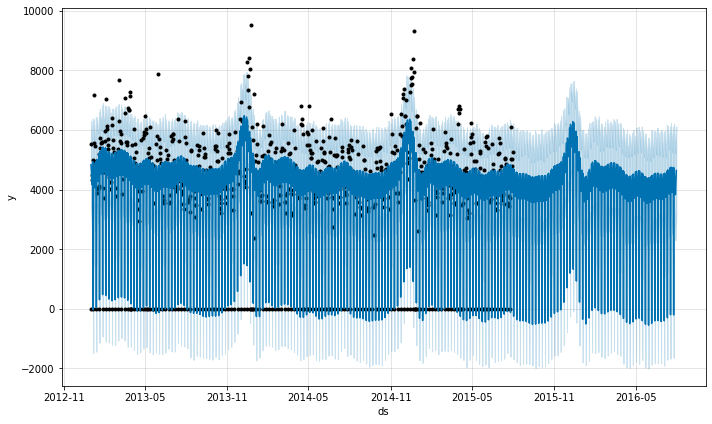

In [ ]:
m.plot(forecast);

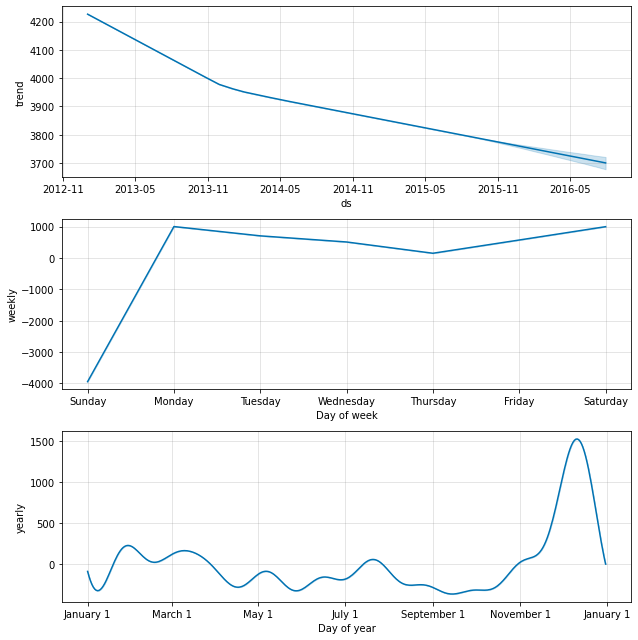

In [ ]:
m.plot_components(forecast);

### Model Open Days Only

In [ ]:
df_p2 = store1[store1['Open'] > 0][['Sales']].copy()
df_p2['Date'] = df_p2.index

In [ ]:
df_p2.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [ ]:
df_p2.columns = ['y', 'ds']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


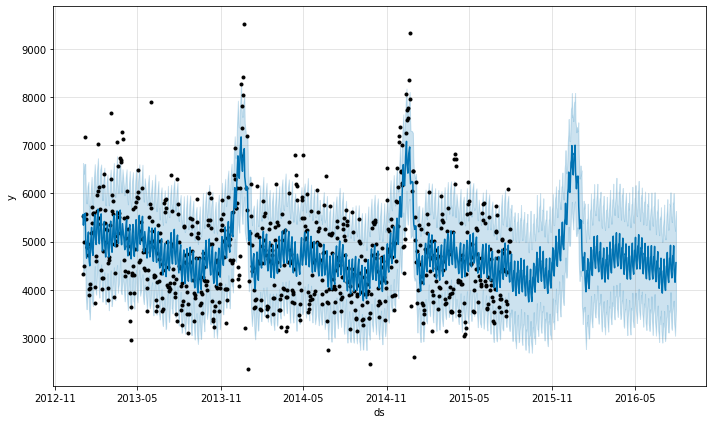

In [ ]:
m2 = Prophet()
m2.fit(df_p2)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

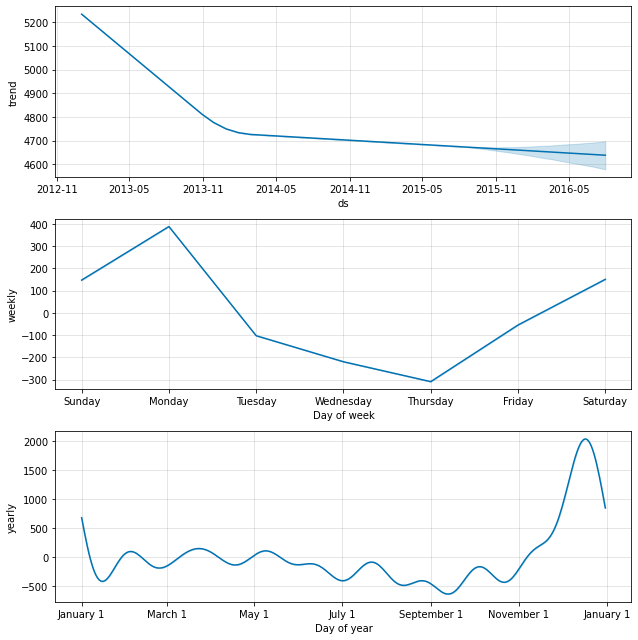

In [ ]:
m2.plot_components(forecast2);

### Add Holidays

In [ ]:
m3 = Prophet()

In [ ]:
m3.add_country_holidays(country_name='US')

In [ ]:
m3.fit(df_p2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future3 = m3.make_future_dataframe(periods=365)

In [ ]:
forecast3 = m3.predict(future3)

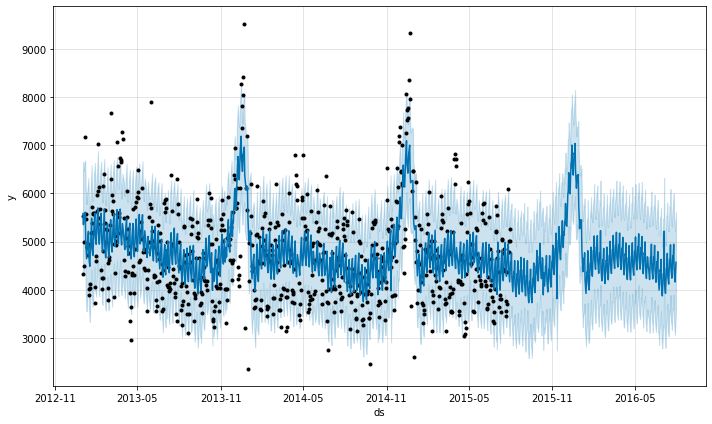

In [ ]:
m3.plot(forecast3);

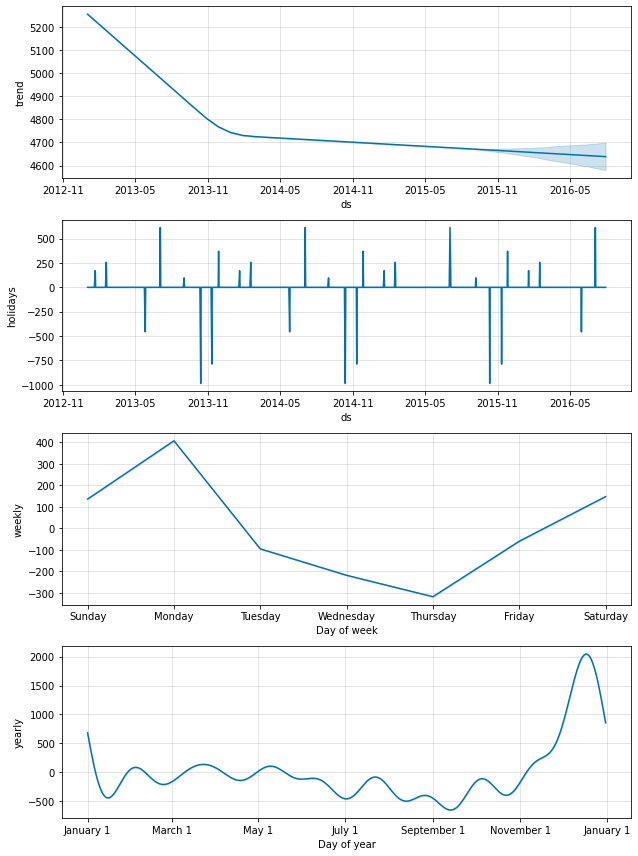

In [ ]:
m3.plot_components(forecast3);

### Add Regressors

In [ ]:
set(store1['StateHoliday'])

{'0', 'a', 'b', 'c'}

In [ ]:
set(store1['SchoolHoliday'])

{0, 1}

In [ ]:
df_p['open'] = store1['Open']
df_p['promo'] = store1['Promo']
df_p[['SH1', 'SH2', 'SH3']] = pd.get_dummies(
    store1['StateHoliday'], drop_first=True)
df_p['SchoolHoliday'] = store1['SchoolHoliday']

In [ ]:
df_p.head(20)

,y,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
Date,,,,,,,,
2013-01-01,0,2013-01-01,0,0,1,0,0,1
2013-01-02,5530,2013-01-02,1,0,0,0,0,1
2013-01-03,4327,2013-01-03,1,0,0,0,0,1
2013-01-04,4486,2013-01-04,1,0,0,0,0,1
2013-01-05,4997,2013-01-05,1,0,0,0,0,1
2013-01-06,0,2013-01-06,0,0,0,0,0,1
2013-01-07,7176,2013-01-07,1,1,0,0,0,1
2013-01-08,5580,2013-01-08,1,1,0,0,0,1
2013-01-09,5471,2013-01-09,1,1,0,0,0,1


In [ ]:
m4 = Prophet()
m4.add_regressor('open', mode='multiplicative')
m4.add_regressor('promo', mode='additive')
m4.add_regressor('SH1', mode='additive')
m4.add_regressor('SH2', mode='additive')
m4.add_regressor('SH3', mode='additive')
m4.add_regressor('SchoolHoliday', mode='additive')
m4.fit(df_p)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future4 = m4.make_future_dataframe(periods=365)

In [ ]:
train_idx = future4['ds'].isin(df_p.index)
test_idx = ~train_idx

In [ ]:
regressors = ['open', 'promo', 'SH1', 'SH2', 'SH3', 'SchoolHoliday']
for r in regressors:
  future4.loc[train_idx, r] = df_p[r].to_list()

In [ ]:
# let's just pretend we know this, even though we do not
# it would take a lot of work to gather this data
future4.loc[test_idx, 'open'] = \
  future4.loc[test_idx, 'ds'].apply(lambda x: 1.0 * (x.weekday() != 6))

for r in regressors[1:]:
  future4.loc[test_idx, r] = \
    df_p.iloc[-365:][r].to_list()

In [ ]:
future4.tail(10)

,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
1297,2016-07-21,1.0,0.0,0.0,0.0,0.0,0.0
1298,2016-07-22,1.0,0.0,0.0,0.0,0.0,0.0
1299,2016-07-23,1.0,0.0,0.0,0.0,0.0,0.0
1300,2016-07-24,0.0,0.0,0.0,0.0,0.0,0.0
1301,2016-07-25,1.0,0.0,0.0,0.0,0.0,0.0
1302,2016-07-26,1.0,1.0,0.0,0.0,0.0,1.0
1303,2016-07-27,1.0,1.0,0.0,0.0,0.0,1.0
1304,2016-07-28,1.0,1.0,0.0,0.0,0.0,1.0
1305,2016-07-29,1.0,1.0,0.0,0.0,0.0,1.0
1306,2016-07-30,1.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
forecast4 = m4.predict(future4)

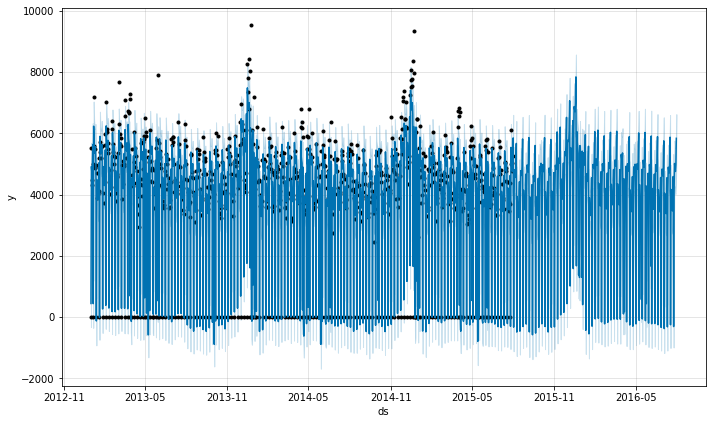

In [ ]:
m4.plot(forecast4);

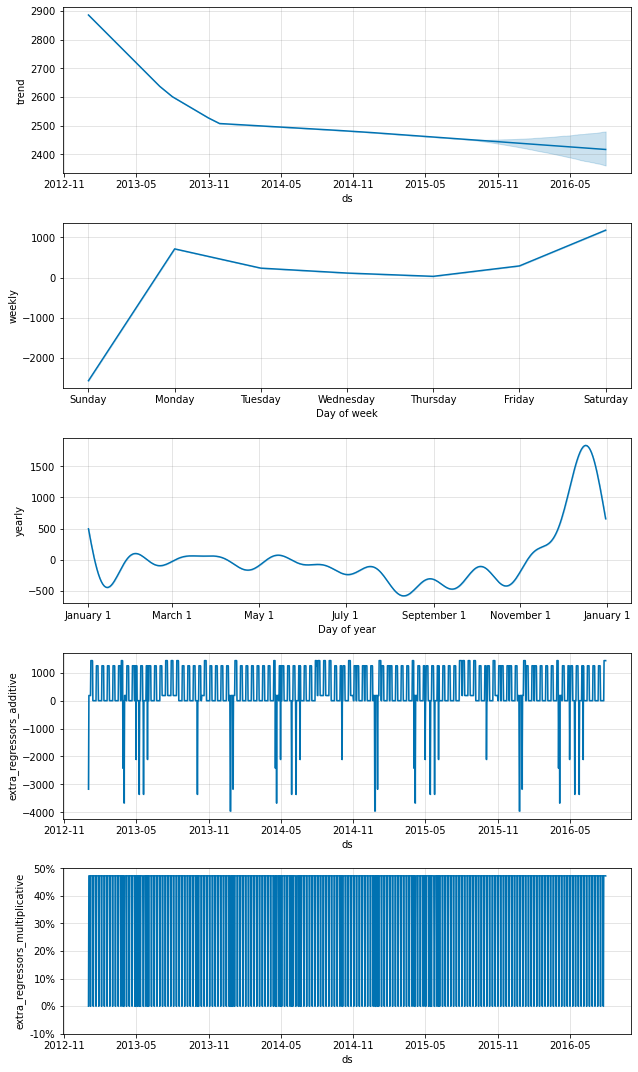

In [ ]:
m4.plot_components(forecast4);

### Cross-Validation

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(
    m,
    initial='730 days',
    period='30 days',
    horizon='60 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-03,4608.376582,3200.809533,6053.976519,5023,2015-01-02
1,2015-01-04,-444.565826,-2005.710061,1036.149545,0,2015-01-02
2,2015-01-05,4572.684326,3070.834602,6126.546872,6239,2015-01-02
3,2015-01-06,4189.162095,2689.079867,5671.408699,4574,2015-01-02
4,2015-01-07,3952.015977,2411.866518,5357.977668,4796,2015-01-02
...,...,...,...,...,...,...
355,2015-07-27,4789.184620,3421.450512,6177.670334,6102,2015-06-01
356,2015-07-28,4464.485414,3021.073447,5990.255852,5011,2015-06-01
357,2015-07-29,4249.962890,2783.773974,5738.852668,4782,2015-06-01
358,2015-07-30,3874.438388,2374.201155,5249.539976,5020,2015-06-01


In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
pm = performance_metrics(df_cv)
pm

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,6 days,2.221245e+06,1490.384126,918.436392,0.137275,0.550132,0.805556
1,7 days,1.585681e+06,1259.238251,757.079261,0.132641,0.491395,0.833333
2,8 days,1.459871e+06,1208.251367,703.388754,0.123082,0.485831,0.888889
3,9 days,1.164337e+06,1079.044443,687.894023,0.144055,0.453463,0.916667
4,10 days,5.041363e+05,710.025559,577.439093,0.155630,0.460131,0.944444
5,11 days,4.958301e+05,704.152037,569.154428,0.147922,0.403439,0.944444
6,12 days,8.586663e+05,926.642492,633.780982,0.147922,0.450384,0.944444
7,13 days,8.282358e+05,910.074600,605.579597,0.134731,0.441833,0.944444
8,14 days,7.840399e+05,885.460274,567.313251,0.122677,0.433221,0.944444
9,15 days,6.562813e+05,810.111898,497.811275,0.103000,0.414605,0.972222


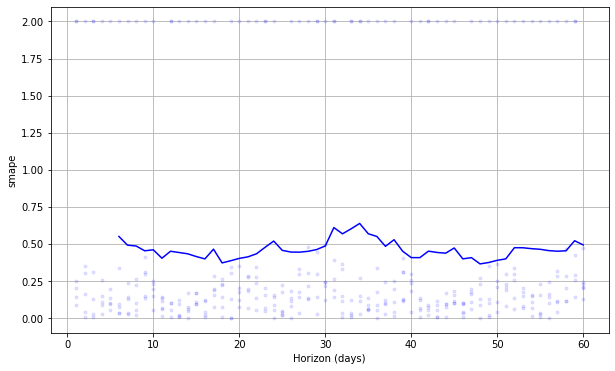

In [ ]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [ ]:
df_cv2 = cross_validation(
    m2,
    initial='730 days',
    period='30 days',
    horizon='60 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


In [ ]:
pm2 = performance_metrics(df_cv2)

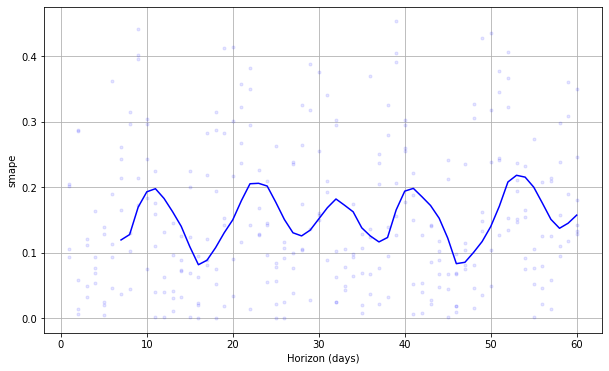

In [ ]:
plot_cross_validation_metric(df_cv2, metric='smape');

In [ ]:
df_cv3 = cross_validation(
    m3,
    initial='730 days',
    period='30 days',
    horizon='60 days')
pm3 = performance_metrics(df_cv3)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


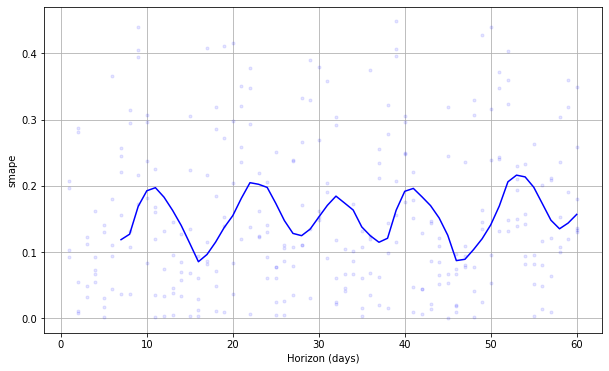

In [ ]:
plot_cross_validation_metric(df_cv3, metric='smape');

In [ ]:
df_cv4 = cross_validation(
    m4,
    initial='730 days',
    period='30 days',
    horizon='60 days')
pm4 = performance_metrics(df_cv4)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


INFO:prophet:Skipping MAPE because y close to 0


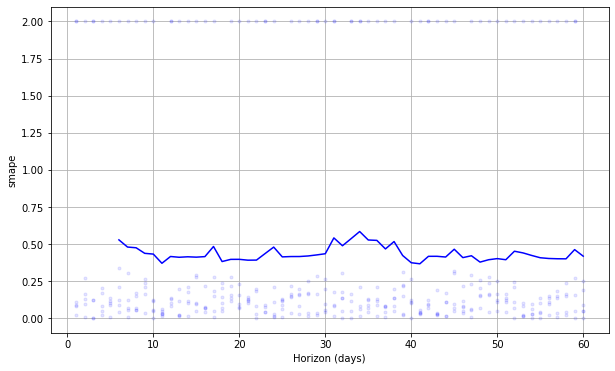

In [ ]:
plot_cross_validation_metric(df_cv4, metric='smape');

In [ ]:
pm['smape'].mean(), pm2['smape'].mean(), pm3['smape'].mean(), pm4['smape'].mean()

(0.4617804980318475,
 0.15372140194969053,
 0.1539430334887426,
 0.43568715335879676)

### Changepoint Detection

In [ ]:
from prophet.plot import add_changepoints_to_plot

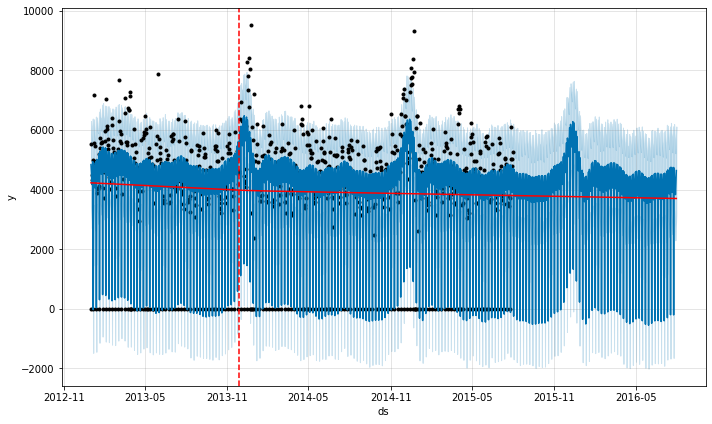

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

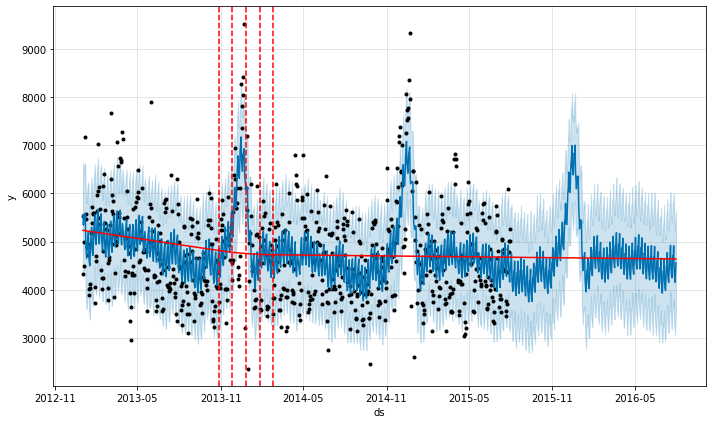

In [ ]:
fig = m2.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m2, forecast2)

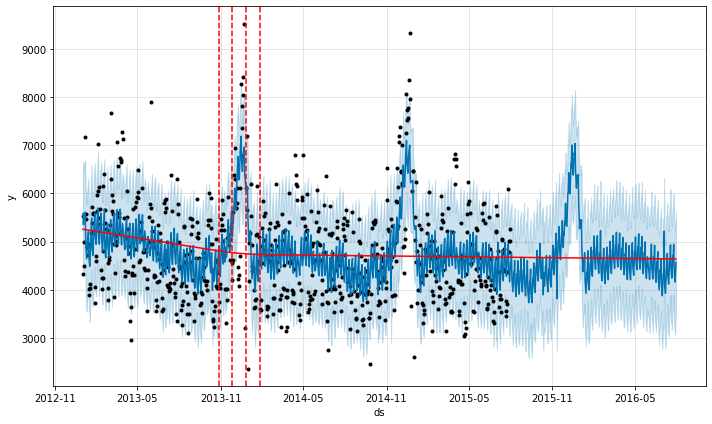

In [ ]:
fig = m3.plot(forecast3)
a = add_changepoints_to_plot(fig.gca(), m3, forecast3)

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


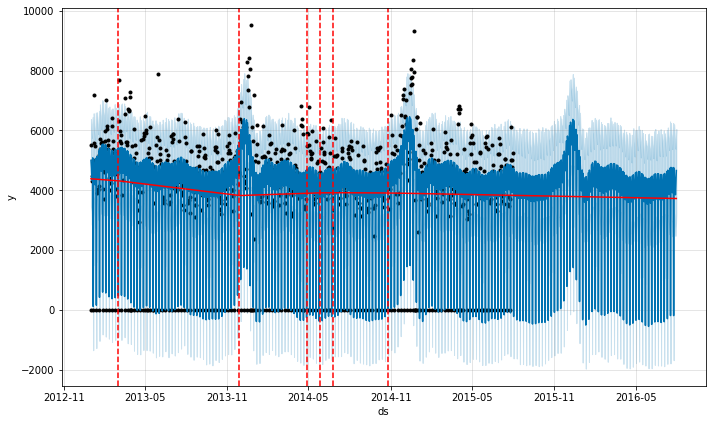

In [ ]:
m_a = Prophet(changepoint_prior_scale=0.5)
forecast_a = m_a.fit(df_p).predict(future)
fig = m_a.plot(forecast_a)
a = add_changepoints_to_plot(fig.gca(), m_a, forecast_a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


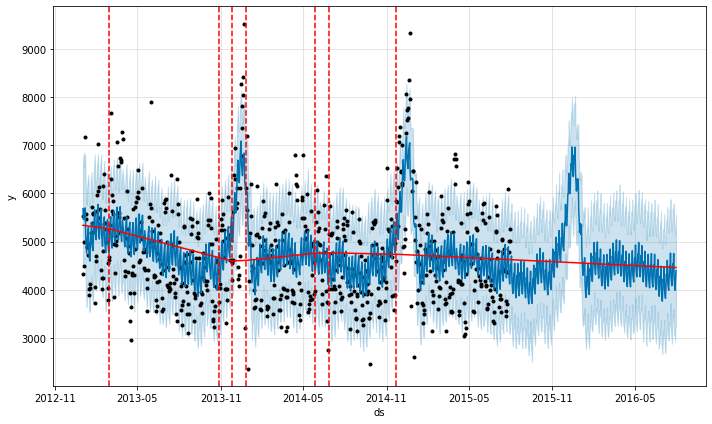

In [ ]:
m2_a = Prophet(changepoint_prior_scale=0.5)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(), m2_a, forecast2_a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


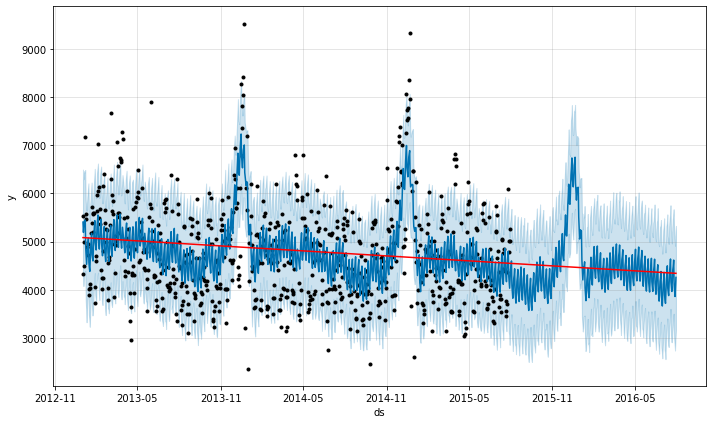

In [ ]:
m2_a = Prophet(changepoint_prior_scale=0.005)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(), m2_a, forecast2_a)